In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 데이터 입력 (mm 단위로 변환)
import pandas as pd

df = pd.read_excel('Bench.xlsx',sheet_name='온도')
df

,vertical,-0.0089,-0.006675,-0.00445,-0.002225,0,0.002225,0.00445,0.006675,0.0089
0,0.000000,200,200.0000,200.0000,200.000,200.000,200.000,200.0000,200.0000,200
1,0.008316,200,191.2500,186.6320,185.677,185.358,185.677,186.6320,191.2500,200
2,0.016632,200,190.1290,182.9290,178.700,177.291,178.700,182.9290,190.1290,200
3,0.024948,200,192.7100,187.6420,184.754,183.791,184.754,187.6420,192.7100,200
4,0.033264,200,192.3475,186.7645,183.589,182.530,183.589,186.7645,192.3475,200
5,0.041580,200,191.9850,185.8870,182.424,181.269,182.424,185.8870,191.9850,200
6,0.049896,200,193.8400,189.4890,187.243,186.495,187.243,189.4890,193.8400,200
7,0.058212,200,193.9080,188.9810,185.696,184.602,185.696,188.9810,193.9080,200
8,0.066528,200,194.9630,190.7910,187.858,186.880,187.858,190.7910,194.9630,200
9,0.074844,200,195.9930,192.6760,190.314,189.527,190.314,192.6760,195.9930,200


In [2]:
vertical = df['vertical'].to_numpy()
horizontal = pd.Series(df.columns[1:].astype(float)).to_numpy()
# df의 각 열(온도 데이터)을 meshgrid 형태로 변환
temperature = df.iloc[:, 1:].to_numpy()

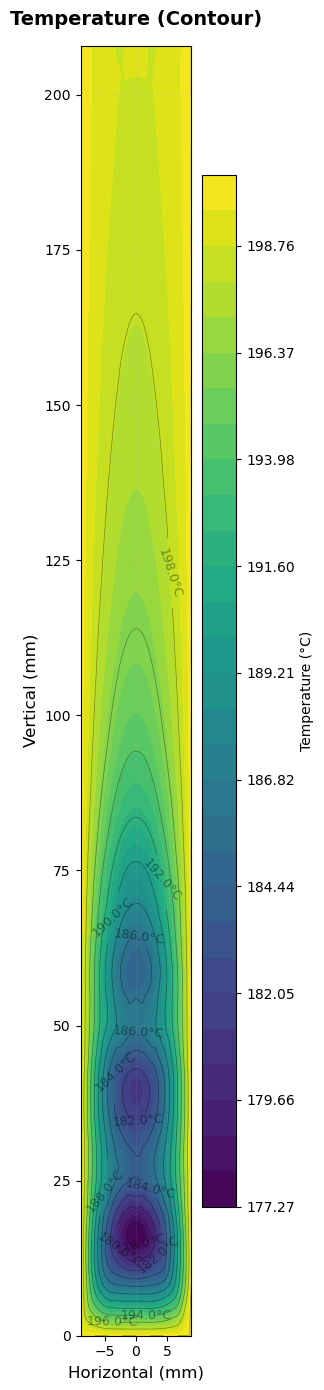

In [3]:
# vertical, horizontal, temperature 변수에 맞게 코드 수정
# 단위가 m이므로 mm로 변환 (1000 곱하기)
vertical_mm = vertical * 1000
horizontal_mm = horizontal * 1000

# 메쉬그리드 생성 (horizontal: x축, vertical: y축, 단위 mm)
X, Y = np.meshgrid(horizontal_mm, vertical_mm)

# 고해상도 보간용 그리드 생성 (단위 mm)
horizontal_fine = np.linspace(horizontal_mm.min(), horizontal_mm.max(), 200)
vertical_fine = np.linspace(vertical_mm.min(), vertical_mm.max(), 500)
X_fine, Y_fine = np.meshgrid(horizontal_fine, vertical_fine)

# 원본 데이터 포인트 (각 위치에 대한 온도값, 단위 mm)
points = np.array([(x, y) for y in vertical_mm for x in horizontal_mm])
values = temperature.flatten()

# cubic 보간으로 부드러운 온도 데이터 생성
temperature_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

# 플롯 생성 (세로로 긴 반응기 형상)
fig, ax = plt.subplots(figsize=(6, 14))

# 등고선 플롯
levels = np.linspace(np.nanmin(temperature_fine), np.nanmax(temperature_fine), 30)
contourf = ax.contourf(X_fine, Y_fine, temperature_fine, levels=levels, cmap='viridis')
contour = ax.contour(X_fine, Y_fine, temperature_fine, levels=12, colors='black', 
                    linewidths=0.5, alpha=0.4)
ax.clabel(contour, inline=True, fontsize=9, fmt='%.1f°C')

ax.set_xlabel('Horizontal (mm)', fontsize=12)
ax.set_ylabel('Vertical (mm)', fontsize=12)
ax.set_title('Temperature (Contour)', fontsize=14, fontweight='bold', pad=15)
ax.set_aspect('equal')

# 컬러바 추가
cbar = plt.colorbar(contourf, ax=ax, label='Temperature (°C)', pad=0.02, shrink=0.8, aspect=30)
cbar.ax.tick_params(labelsize=10)

# 그리드 추가
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [4]:
# 그래프를 파일로 저장 (예: 'temperature_contour.png')
fig.savefig('temperature_contour.png', dpi=300, bbox_inches='tight')
